<a href="https://colab.research.google.com/github/YenLinWu/Trend_Detection/blob/main/Multidimensional_Scaling/Multidimensional_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center' ><font size='60'>Multidimensional Scaling<br>多維標度法</font></div>

## Import Library

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')
import sklearn
from sklearn import manifold

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print( 'Matplotlib version:', matplotlib. __version__)
print( 'Scikit-Learn version:', sklearn.__version__ )

Numpy version: 1.19.5
Pandas version: 1.1.5
Matplotlib version: 3.2.2
Scikit-Learn version: 1.0.1


## [Multidimensional Scaling, MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn-manifold-mds)  

MDS 降維演算法的特性:
- 將原始高維度空間中的樣本點，投影到低維度的空間中。
- 在低維空間中，保持樣本點在原始空間中彼此間的距離。   

### Metric MDS(公制 MDS)

原始資料 :  
- 資料說明 : 各城市間的距離
- 資料來源 : 使用 [Google 地圖](https://www.google.com/maps/@23.7262296,121.2249882,439653m/data=!3m1!1e3) 測量距離兩點之間的距離([測量教學](https://support.google.com/maps/answer/1628031?hl=zh-Hant&co=GENIE.Platform%3DDesktop) )  

In [ ]:
data = pd.read_excel('/content/SampleData.xlsx', sheet_name='DistanceMatrix', 
                     index_col=0)
data

,Taipei City,Taoyuan City,Hsinchu County,Taichung City,Changhua City,Tainan City,Kaohsiung City,Taitung County,Yilan County
Taipei City,0.00,26.08,64.87,134.88,147.65,264.52,297.23,254.18,40.77
Taoyuan City,26.08,0.00,39.87,114.22,126.36,248.00,282.95,246.50,55.46
Hsinchu County,64.87,39.87,0.00,79.85,91.94,216.55,253.67,226.46,80.17
Taichung City,134.88,114.22,79.85,0.00,13.58,136.06,173.69,156.33,124.13
Changhua City,147.65,126.36,91.94,13.58,0.00,125.68,164.87,153.67,137.73
Tainan City,264.52,248.00,216.55,136.06,125.68,0.00,41.84,88.75,243.38
Kaohsiung City,297.23,282.95,253.67,173.69,164.87,41.84,0.00,78.65,270.96
Taitung County,254.18,246.50,226.46,156.33,153.67,88.75,78.65,0.00,222.21
Yilan County,40.77,55.46,80.17,124.13,137.73,243.38,270.96,222.21,0.00


特徵降維且視覺化 :

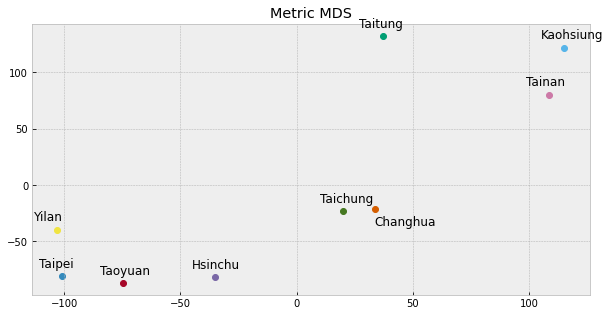

In [ ]:
# 建立 MDS 模型
# 
# MDS 函數參數的說明:
# n_components : 降維後的維度，預設為 2 維；
# metric : 公制或非公制 MDS，預設為公制；
# max_iter : SMACOF 演算法的最大迭代次數；
# eps : 定義 stress 的收斂條件；
# dissimilarity : 度量相異性距離的方法，預設為歐式距離。
mds = manifold.MDS(n_components=2, metric=True, max_iter=1000, eps=1e-10, 
                   random_state=np.random.RandomState(seed=3),
                   dissimilarity='precomputed')

# 使用 MDS 將原始資料降至 2 維平面中，且取得降維後的座標位置。
pos = mds.fit_transform(data)

# 繪製降維後資料在 2 維平面中的位置
plt.figure(figsize=(10,5))
for i, c in zip(range(len(pos)), [i.split(' ')[0] for i in data.index]):
    plt.scatter(pos[i][1], pos[i][0], lw=1)
    if c!='Changhua':
        plt.text(pos[i][1]-10, pos[i][0]+8, c, fontsize=12)
    else: 
        plt.text(pos[i][1], pos[i][0]-15, c, fontsize=12)
plt.title('Metric MDS')
plt.savefig('Metric_MDS_Demo.jpg')
plt.show()

### Non-Metric MDS(非公制 MDS)

原始資料 :  
- 資料說明 : 各城市的照時數統計  
- 資料來源 : [交通部中央氣象局 > 氣候 > 氣候統計 > 氣候月平均 > 選擇「日照時數」](https://www.cwb.gov.tw/V8/C/C/Statistics/monthlymean.html)   

|城市|日照時數(小時)|  
|:---:|---:|  
|Taipei|1373.8|  
|Hsinchu|1845.4|  
|Taichung|2010.5|  
|Tainan|2202.9|  
|Kaohsiung|2281.8|  
|Taitung|1783.8|  
|Yilan|1429.6|   

</br>    
計算各城市彼此間時差的絕對值，我們能將原始資料轉換成下列的對稱矩陣:   

In [ ]:
data = pd.read_excel('/content/SampleData.xlsx', sheet_name='NonDistanceMatrix', 
                     index_col=0)
data

,Taipei,Hsinchu,Taichung,Tainan,Kaohsiung,Taitung,Yilan
Taipei,0.0,471.6,636.7,829.1,908.0,410.0,55.8
Hsinchu,471.6,0.0,165.1,357.5,436.4,61.6,415.8
Taichung,636.7,165.1,0.0,192.4,271.3,226.7,580.9
Tainan,829.1,357.5,192.4,0.0,78.9,419.1,773.3
Kaohsiung,908.0,436.4,271.3,78.9,0.0,498.0,852.2
Taitung,410.0,61.6,226.7,419.1,498.0,0.0,354.2
Yilan,55.8,415.8,580.9,773.3,852.2,354.2,0.0


特徵降維且視覺化 :

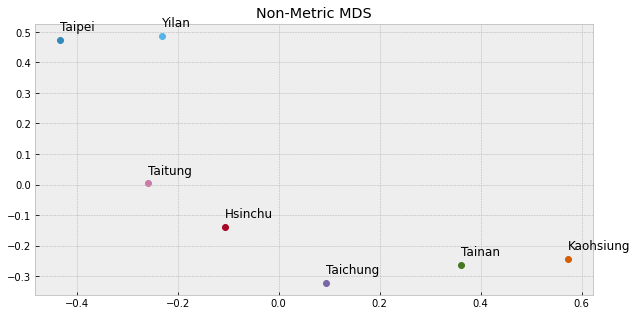

In [ ]:
# 建立 MDS 模型
# 
# MDS 函數參數的說明:
# n_components : 降維後的維度，預設為 2 維；
# metric : 公制或非公制 MDS，預設為公制；
# max_iter : SMACOF 演算法的最大迭代次數；
# eps : 定義 stress 的收斂條件；
# dissimilarity : 度量相異性距離的方法，預設為歐式距離。
mds = manifold.MDS(n_components=2, metric=False, max_iter=1000, eps=1e-10, 
                   random_state=np.random.RandomState(seed=144),
                   dissimilarity='precomputed')

# 使用 MDS 將原始資料降至 2 維平面中，且取得降維後的座標位置。
pos = mds.fit_transform(data)

# 繪製降維後資料在 2 維平面中的位置
plt.figure(figsize=(10,5))
for i, c in zip(range(len(pos)), data.index):
    plt.scatter(pos[i][1], pos[i][0], lw=1)
    plt.text(pos[i][1], pos[i][0]+0.03, c, fontsize=12)
plt.title('Non-Metric MDS')
plt.savefig('Non-Metric_MDS_Demo.jpg')
plt.show()

## References  

[1] [Multi-dimensional Scaling (MDS)](https://scikit-learn.org/stable/modules/manifold.html#multi-dimensional-scaling-mds)  
[2] [sklearn.manifold.MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn-manifold-mds)